In [24]:
import pystan
import scipy
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [17]:
# !pip install scipy

In [18]:
# !conda install pystan

In [19]:
schools_code = """
data {
    int<lower=0> J; // number of schools
    vector[J] y; // estimated treatment effects
    vector<lower=0>[J] sigma; // s.e. of effect estimates
}
parameters {
    real mu;
    real<lower=0> tau;
    vector[J] eta;
}
transformed parameters {
    vector[J] theta;
    theta = mu + tau * eta;
}
model {
    eta ~ normal(0, 1);
    y ~ normal(theta, sigma);
}
"""

schools_dat = {'J': 8,
               'y': [28,  8, -3,  7, -1,  1, 18, 12],
               'sigma': [15, 10, 16, 11,  9, 11, 10, 18]}

sm = pystan.StanModel(model_code=schools_code)
fit = sm.sampling(data=schools_dat, iter=1000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_19a09b474d1901f191444eaf8a6b8ce2 NOW.


In [20]:
# !gcc --version

In [21]:
la = fit.extract(permuted=True)  # return a dictionary of arrays
mu = la['mu']

## return an array of three dimensions: iterations, chains, parameters
a = fit.extract(permuted=False)

In [22]:
print(fit)

Inference for Stan model: anon_model_19a09b474d1901f191444eaf8a6b8ce2.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu         7.87    0.13    4.6  -0.97   4.73   7.84  10.96  16.96   1314    1.0
tau        6.21    0.17   5.27   0.18   2.36    4.9   8.75  20.32    911    1.0
eta[1]     0.37    0.02   0.92  -1.49  -0.21   0.37   0.97   2.12   2047    1.0
eta[2]     0.03    0.02   0.85  -1.65   -0.5   0.03   0.56   1.71   2053    1.0
eta[3]    -0.19    0.02   0.92  -1.99  -0.82   -0.2   0.45   1.56   1750    1.0
eta[4]    -0.03    0.02   0.88   -1.8   -0.6  -0.04   0.54   1.63   1912    1.0
eta[5]    -0.37    0.02    0.9  -2.09  -0.97   -0.4    0.2   1.48   1447    1.0
eta[6]    -0.19    0.02   0.91  -1.91  -0.79  -0.21   0.38   1.62   2024    1.0
eta[7]     0.33    0.02   0.86  -1.45  -0.22   0.34   0.92   1.97   1925    1.0
eta[8]     0.

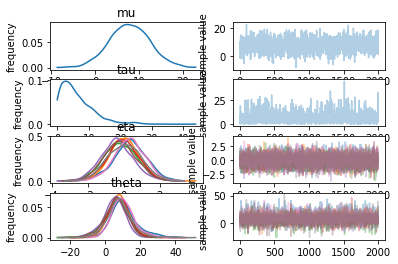

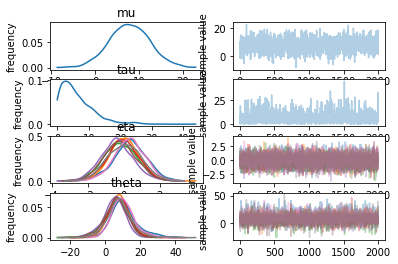

In [23]:
fit.plot()

In [37]:
df = pd.read_csv('./projects/full_bayesian/reports/full_bayesian_UKB_v5/UKB/10_1566308831.1779587_final_report.csv')


In [38]:
df.head()

,project,dataset,model_name,volume_id,samples,sncc,ged,iou_spleen,iou_liver,iou_mean,...,surface_distance_avg_mean,umap_surface_distance_prtogt_spleen,umap_surface_distance_prtogt_liver,umap_surface_distance_prtogt_mean,umap_surface_distance_gttopr_spleen,umap_surface_distance_gttopr_liver,umap_surface_distance_gttopr_mean,umap_surface_distance_avg_spleen,umap_surface_distance_avg_liver,umap_surface_distance_avg_mean
0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0,2,full_bayesian_UKB_v5,0,10,0.578218,0.329935,0.390655,0.498333,0.444494,...,0.697752,0.844037,0.821017,0.832527,0.983051,0.981126,0.982089,0.913544,0.901072,0.907308


In [39]:
df.head(50).transpose().head(24).to_html('df_bayes_ukb.html')